In [1]:
## change output font size
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style> 
    body {
      font-size: 28px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [2]:
print("hello")

hello


In [3]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

MessageError: ignored

In [ ]:
import os
os.chdir("/content/drive/My Drive/AIET_LAB/")

In [ ]:
img_dir = './Binary_morphology/images/'

In [ ]:
!ls ./Binary_morphology/images/

Aerial_512_gray.tiff	      House.tiff
Airplane_1024_gray.tiff       Jelly_beans2_256_color.tiff
Airplane_1.tiff		      Jelly_beans_256_color.tiff
Airplane_256_gray.tiff	      Male_1024_gray.tiff
Airplane_512_color.tiff       Moon_surface_256_gray.tiff
Airport_1024.tiff	      Peppers_512_color.tiff
APC.tiff		      Resolution_chart_256_gray.tiff
Baboon_512_color.tiff	      ruler.512.tiff
boat.512.tiff		      Sailboat_512_color.tiff
Car_apcs.tiff		      Splash_512_color.tiff
Car_APCs.tiff		      Stram_bridge_Gray_512.tiff
Chemical_plant_256_gray.tiff  Stream_bridge_512_gray.tiff
Clock_256_gray.tiff	      Tank_2.tiff
Couple_512_gray.tiff	      Tank_3.tiff
Couple.tiff		      Tank.tiff
Female2_256_color.tiff	      Tree_256_color.tiff
Female_256_color.tiff	      Truck_APCS_2.tiff
Female3_256_color.tiff	      Truck_APCs.tiff
gray21.512.tiff		      Truck.tiff
house.tiff



# Part-1, Read and plot images

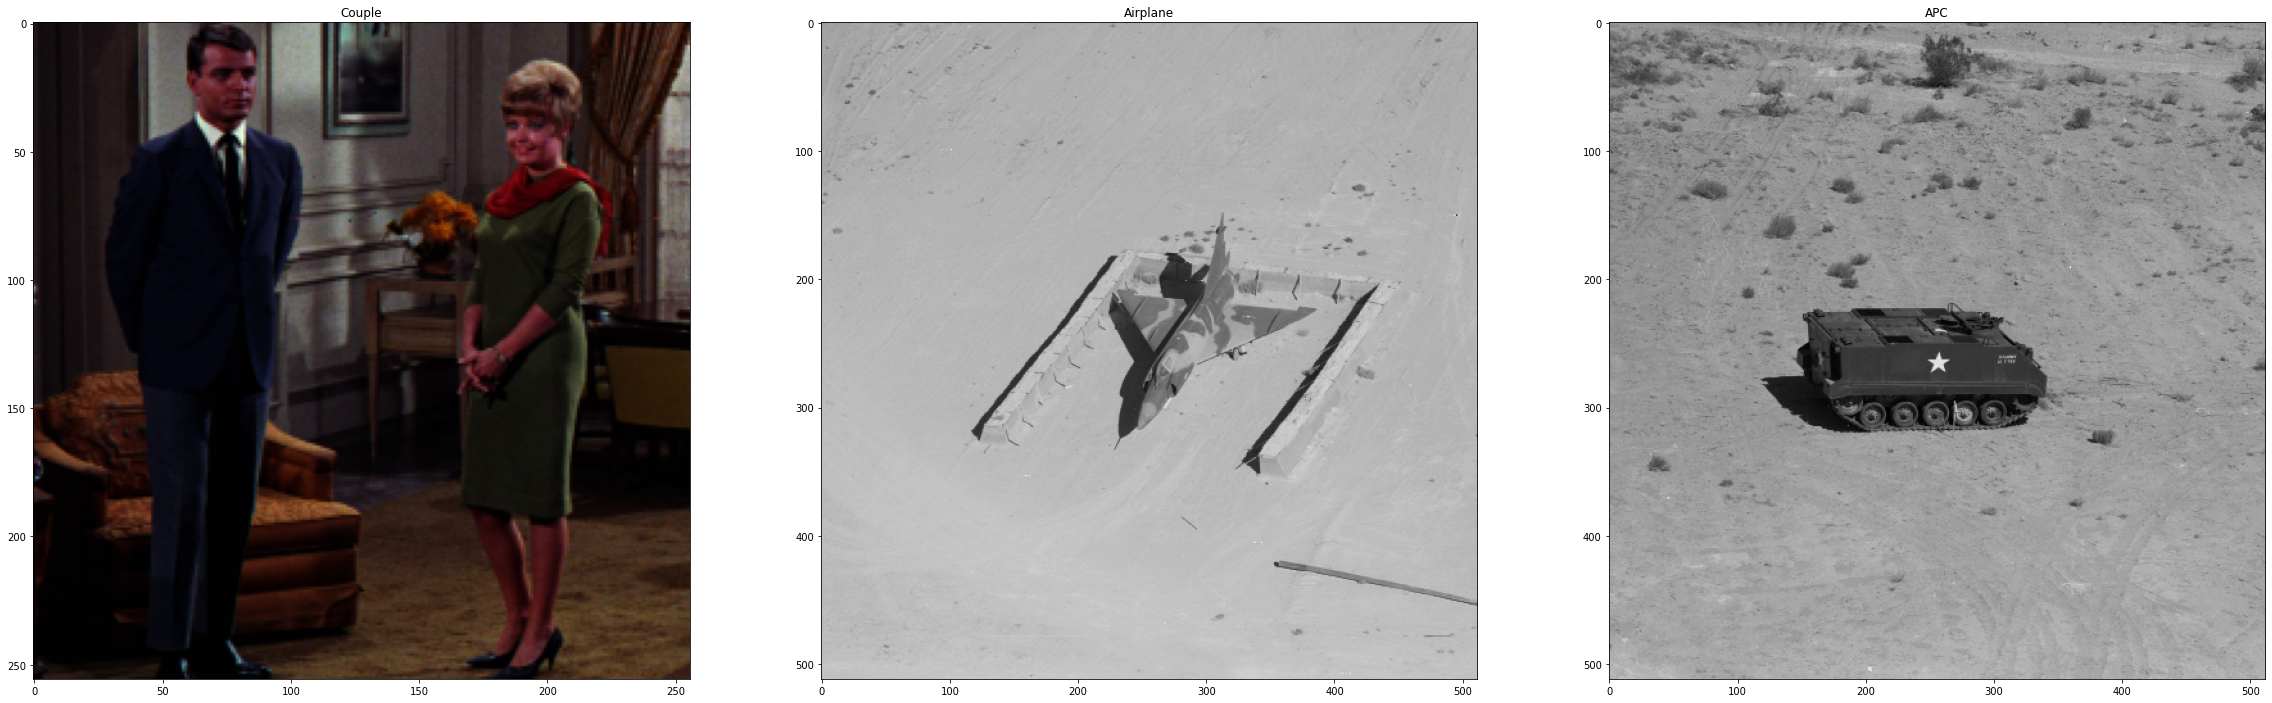

In [ ]:
'''
Part-1, Read and plot images
'''
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
I = mpimg.imread(os.path.join(img_dir,'Couple.tiff'))
I1 = mpimg.imread(os.path.join(img_dir,'Airplane_1.tiff'))
I2 = mpimg.imread(os.path.join(img_dir,'APC.tiff'))

plt.figure(figsize=(40,24))
plt.subplot(1,3,1)
plt.imshow(I,cmap='gray')
plt.title("Couple")

plt.subplot(1,3,2)
plt.imshow(I1,cmap='gray')
plt.title("Airplane")

plt.subplot(1,3,3)
plt.imshow(I2,cmap='gray')
plt.title("APC")

plt.show()

(512, 512, 3)


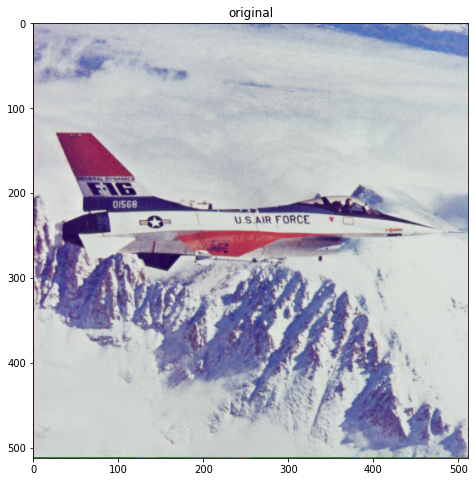

In [ ]:
from skimage import color
from skimage import io
from skimage.filters import threshold_otsu


img = io.imread(os.path.join(img_dir,'Airplane_512_color.tiff'))
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.title("original")
print(img.shape)

(512, 512) 0.9106529411764706 0.04593882352941177


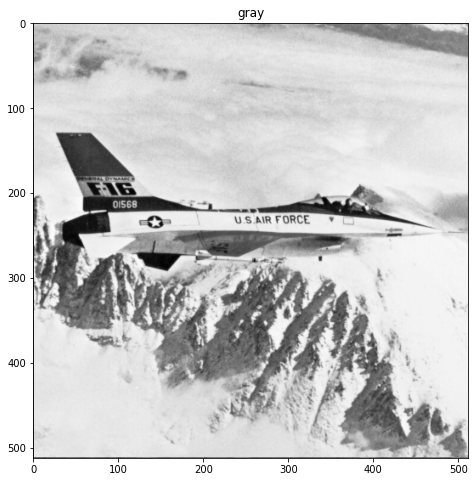

In [ ]:
# io.imshow(imgGray)
imgGray = color.rgb2gray(img)
plt.figure(figsize=(8,8))
plt.imshow(imgGray)
plt.title("gray")
print(imgGray.shape, np.max(imgGray),np.min(imgGray))

0.9106529411764706 0.04593882352941177 0.700726102854411


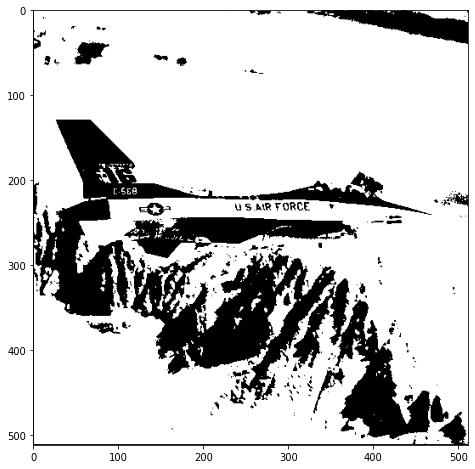

In [ ]:
#Now comes the code for binary image:
thresh = threshold_otsu(imgGray)
num = np.array(imgGray)
print(num.max(), num.min(), num.mean())
bin = num > thresh
bin.astype(int)
plt.figure(figsize=(8,8))
plt.imshow(bin,cmap='gray')
plt.gray()

In [ ]:
np.max(bin), np.min(bin), bin[0:5,0:5]

(True, False, array([[False,  True,  True,  True,  True],
        [False,  True,  True,  True,  True],
        [False,  True,  True,  True,  True],
        [False,  True,  True,  True,  True],
        [False,  True,  True,  True,  True]]))

# Part-2, Maximum, Minimum intensity pixel values, Bits per pixel, Resolution

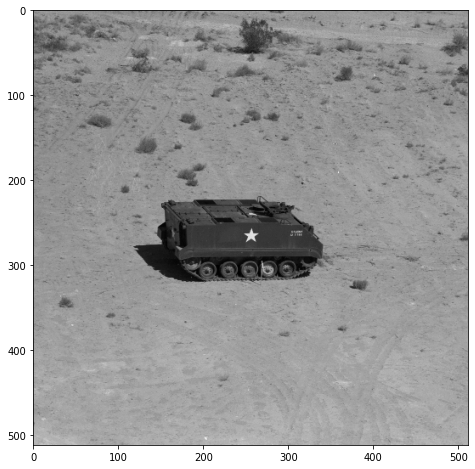

The Maximum pixel value of I =  215
The Minimum pixel value of I =  12
Bits per pixel, bpp =  8
The Resolution of I =  512 * 512
The Resolution/Total pixels in I =  262144


In [ ]:
'''
Part-2, Maximum, Minimum intensity pixel values, Bits per pixel, Resolution
'''
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
def details(I):
 plt.figure(figsize=(8,8))
 plt.imshow(I,cmap='gray')
 plt.show()
 maxi=np.max(I)
 mini=np.min(I)
 print("The Maximum pixel value of I = ",maxi)
 print("The Minimum pixel value of I = ",mini)
 bpp=math.floor(math.log2(maxi))+1
 x=np.shape(I)[0]
 y=np.shape(I)[1]
 print("Bits per pixel, bpp = ",bpp) # bits required for the maximum intensity will be sufficient for all other intensities
 print("The Resolution of I = ",x,"*",y)
 print("The Resolution/Total pixels in I = ",x*y)
#I = mpimg.imread(os.path.join(img_dir,'Couple.tiff'))
#I1 = mpimg.imread(os.path.join(img_dir,'Airplane_1.tiff'))
I2 = mpimg.imread(os.path.join(img_dir,'APC.tiff'))
#details(I)
#details(I1)
details(I2)

# Part-3, Size of image, Efficiency

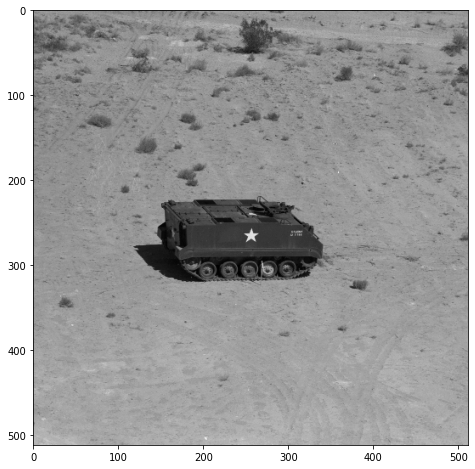

Size of the compressed image =  256.0  KB
Efficiency =  100.0 %


In [ ]:
'''
Part-3, Size of image, Efficiency
'''
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
I = mpimg.imread(os.path.join(img_dir,'Couple.tiff'))
I1 = mpimg.imread(os.path.join(img_dir,'Airplane_1.tiff'))
I2 = mpimg.imread(os.path.join(img_dir,'APC.tiff'))
def si(I):
 plt.figure(figsize=(8,8))
 plt.imshow(I,cmap='gray')
 plt.show()
 maxi=np.max(I)
 bpp=math.floor(math.log2(maxi))+1
 x=np.shape(I)[0]
 y=np.shape(I)[1]
 size_compressed=x*y*bpp/(8*1024)
 max_size=x*y*8/(8*1024)
 print("Size of the compressed image = ",size_compressed," KB")
 print("Efficiency = ",(size_compressed/max_size)*100,"%")
#si(I)
#si(I1)
si(I2)

In [ ]:
print(int(True), int(False))

1 0


# Part-4, Histograms, Modality of Images

Histogram of airplane


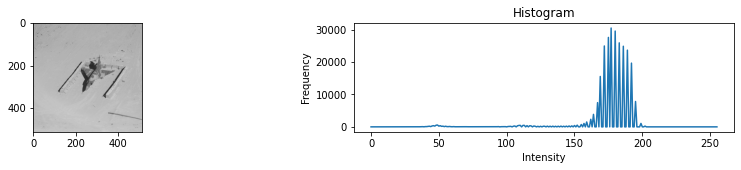

Peak value of Histogram at intensity =  177
Modality of Histogram is 1, Unimodal



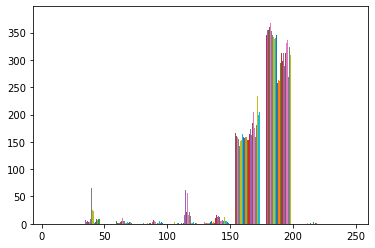

In [ ]:
'''
Part-1, Histograms, Modality of Images
'''
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
#im = mpimg.imread(os.path.join(img_dir,'Couple.tiff'))
im2 = mpimg.imread(os.path.join(img_dir,'Airplane_1.tiff'))
im3 = mpimg.imread(os.path.join(img_dir,'APC.tiff'))
im4 = mpimg.imread(os.path.join(img_dir,'Moon_surface_256_gray.tiff'))
def histo(im):
 temp=np.zeros((np.shape(im)[0],np.shape(im)[1]))
 plt.subplots(figsize=(15, 2))
 plt.subplot(1, 2, 1)
 plt.imshow(im,cmap='gray')
 
 plt.subplot(1,2, 2)
 freq=np.zeros((256,1))
 total=np.shape(im)[0]*(np.shape(im)[1])
 for i in range(0,np.shape(im)[0]):
  for j in range(0,np.shape(im)[1]):
   freq[im[i][j]]=freq[im[i][j]]+1;
 max_val=np.max(freq)
 peak=0
 at=0
 for i in range(0,256):
  if (freq[i]==max_val):
   at=i
   peak=peak+1;
 x_a=np.arange(256)
 plt.plot(x_a, freq)
 plt.xlabel('Intensity')
 plt.ylabel('Frequency')
 plt.title('Histogram')
 plt.show(block=True)
 print("Peak value of Histogram at intensity = ",at)
 if peak==1:
  print("Modality of Histogram is 1, Unimodal\n")
 elif peak==2:
  print("Modality of Histogram is 2, Bimodal\n")
 else :
  print("Modality of Histogram is ",peak,", Multimodal\n")
print("Histogram of airplane")
histo(im2)
plt.hist(im2)
plt.show()
# print("Histogram of truck")
# histo(im2)
# print("Histogram of airport")
# histo(im3)
# print("Histogram of APC")
# histo(im4)

# Part - 5 Binarize using modal thresholding

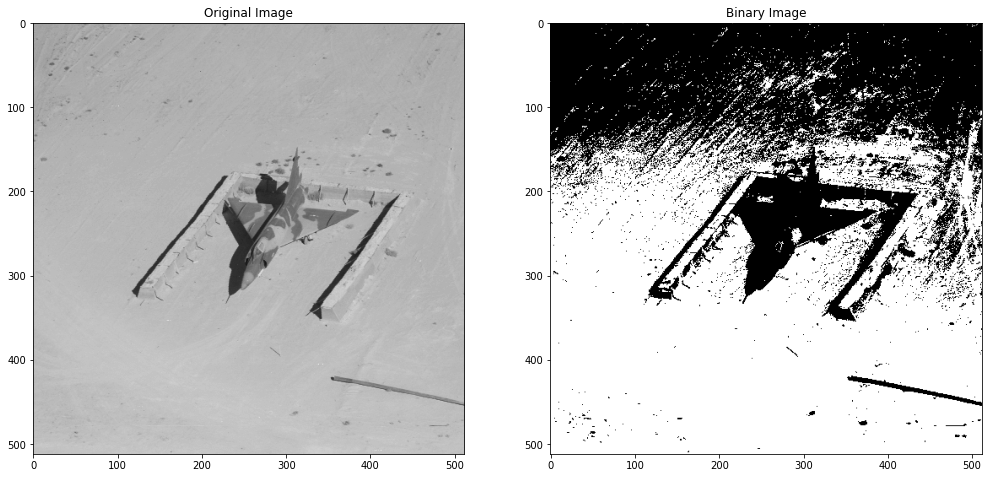

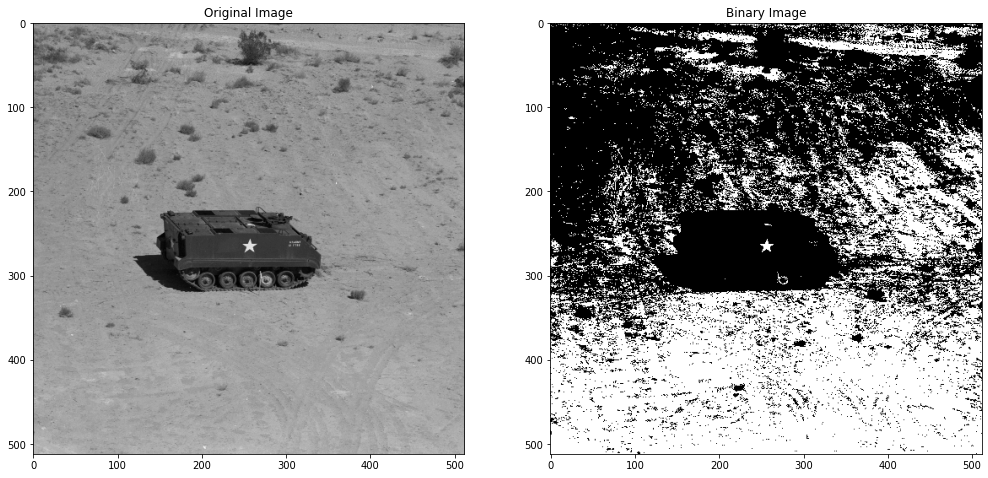

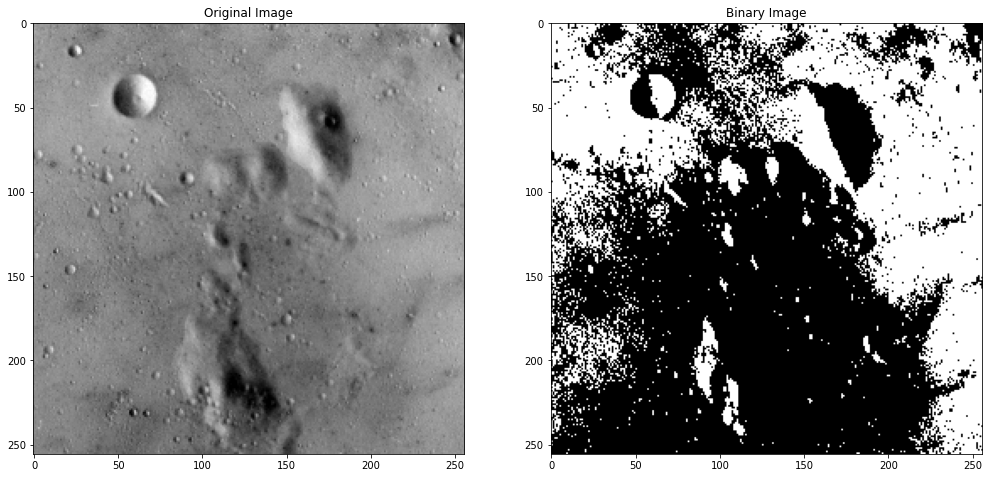

In [ ]:
'''

'''
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

im2 = mpimg.imread(os.path.join(img_dir,'Airplane_1.tiff'))
im3 = mpimg.imread(os.path.join(img_dir,'APC.tiff'))
im4 = mpimg.imread(os.path.join(img_dir,'Moon_surface_256_gray.tiff'))
def binarize_modal(im):
 temp=np.zeros((np.shape(im)[0],np.shape(im)[1]))
 plt.subplots(figsize=(17,8))
 plt.subplot(1, 2, 1)
 plt.imshow(im,cmap='gray')
 plt.title("Original Image")
 freq=np.zeros((256,1))
 total=np.shape(im)[0]*(np.shape(im)[1])
 for i in range(0,np.shape(im)[0]):
  for j in range(0,np.shape(im)[1]):
   freq[im[i][j]]=freq[im[i][j]]+1;
 max_val=np.max(freq)
 peak=0
 at=0
 for i in range(0,256):
  if (freq[i]==max_val):
   at=i
   peak=peak+1
 for i in range(np.shape(im)[0]):
  for j in range(np.shape(im)[1]):
   if im[i][j]>=at:
    temp[i][j]=255
 plt.subplot(1, 2, 2)
 plt.imshow(temp,cmap='gray')
 plt.title("Binary Image")
 plt.show(block=True)

#print("Binarize using modal thresholding of Plane, Image and Binarized Image")
binarize_modal(im2)
#print("Binarize using modal thresholding of Truck, Image and Binarized Image")
binarize_modal(im3)
#print("Binarize using modal thresholding of apc, Image and Binarized Image")
binarize_modal(im4)

# Part - 6, Blob Count 

In [ ]:
def link_reg(R,a,b):
  m,n=R.shape
  k=min(a,b)
  for i in range(m):
    for j in range(n):
      if R[i,j]==a or R[i,j]==b:
        R[i,j]=k

In [ ]:
def components(img): #0=black, 1=White
  m,n=img.shape
  k=1 # label
  blob={}
  R=np.zeros((m,n))
  for i in range(m):
    for j in range(n):
      if i==0 and j==0: ## starting element
        if img[i,j]==0:
          R[i,j]=k
          blob[k]=1
          k+=1
        continue
      elif i==0: ## firt row
        if img[i,j]==0 and img[i,j-1]==0:
          R[i,j]=R[i,j-1]
          blob[R[i,j]]+=1
        elif img[i,j]==0 and img[i,j-1]==1:
          R[i,j]=k
          blob[k]=1
          k+=1
        continue
      elif j==0: ## first column
        if img[i,j]==0 and img[i-1,j]==0:
          R[i,j]=R[i-1,j]
          blob[R[i,j]]+=1
        elif img[i,j]==0 and img[i-1,j]==1:
          R[i,j]=k
          blob[k]=1
          k+=1
        continue
      if img[i,j]==0 and img[i-1,j]==1 and img[i,j-1]==1:
        R[i,j]=k
        blob[k]=1
        k+=1
      elif img[i,j]==0 and img[i-1,j]==0 and img[i,j-1]==1:
        R[i,j]=R[i-1,j]
        blob[R[i,j]]+=1
      elif img[i,j]==0 and img[i-1,j]==1 and img[i,j-1]==0:
        R[i,j]=R[i,j-1]
        blob[R[i,j]]+=1
      elif img[i,j]==0 and img[i-1,j]==0 and img[i,j-1]==0:
        print("R[i,j-1],R[i-1,j] ",R[i,j-1],R[i-1,j])
        R[i,j]=min(R[i,j-1],R[i-1,j])
        h=max(R[i,j-1],R[i-1,j])
        if R[i,j-1]!=R[i-1,j]:
          link_reg(R,R[i,j-1],R[i-1,j]) 
          blob[R[i,j]]+=blob[h]
          blob[h]=0
        blob[R[i,j]]+=1
  return R,blob

R[i,j-1],R[i-1,j]  1.0 1.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  2.0 2.0
R[i,j-1],R[i-1,j]  4.0 4.0
r 
 [[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 4. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 4. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
bl  {1: 4, 2: 16, 3: 1, 4: 4}


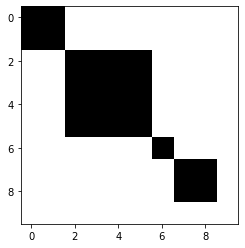

In [ ]:
test_blob = np.ones((10,10))
test_blob[0:2,0:2] = 0
test_blob[2:6,2:6] = 0
test_blob[7:9,7:9] = 0
test_blob[6,6] = 0
plt.imshow(test_blob,cmap='gray')
r,bl = components(test_blob)
print("r \n",r)
print("bl ",bl)

In [ ]:
def histogram(img): ## not necessary
  hist=np.zeros(256)
  m,n=img.shape
  for i in range(m):
    for j in range(n):
      hist[img[i,j]]+=1
  max=0
  modality=0
  mode=[]
  for i in range(256):
    if hist[i]>max:
      max=hist[i]
      modality=1
      mode=[i]
    elif hist[i]==max:
      modality+=1
      mode.append(i)
  return [hist,modality,mode]

In [ ]:
def Thresholding_using_modality(img): 
  mode=histogram(img)[2]
  t=np.mean(mode)
  m,n=img.shape
  bin_img=np.zeros((m,n))
  for i in range(m):
    for j in range(n):
      if img[i,j]>=t:
        bin_img[i,j]=1
  return bin_img

In [ ]:
#imgmoon = mpimg.imread(os.path.join(img_dir,'Moon_surface_256_gray.tiff'))
img_apc = mpimg.imread(os.path.join(img_dir,'Resolution_chart_256_gray.tiff'))
bin_im = Thresholding_using_modality(img_apc)

In [ ]:
bin_im.shape, bin_im[0:5,0:5]

((256, 256), array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

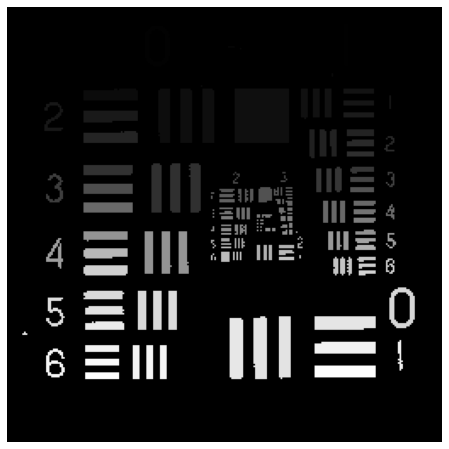

In [ ]:
comp,blobs=components(bin_im)
plt.figure(figsize=(8,8))
plt.imshow(comp,cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
def blob_rem(R,blobs,B):
  blob_sizes=list(blobs.values())
  max_blob_size=max(blob_sizes)
  img=B.copy()
  m,n=img.shape
  #t=1000
  for i in range(m):
    for j in range(n):
      if img[i,j]==0 and blobs[R[i,j]]!=max_blob_size:
        img[i,j]=1
  plt.imshow(img,cmap='gray')

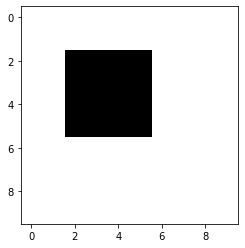

In [ ]:
blob_rem(r,bl,test_blob)

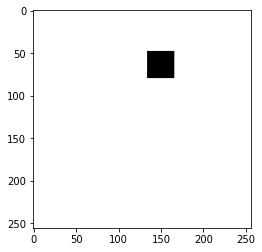

In [ ]:
blob_rem(comp,blobs,bin_im)

# Part 7, b. Erode dilate Median 

In [ ]:
def comp_Im(I, r1, r2):
    RI = np.zeros((r1,r2), dtype=int)
    for i in range(r1):
        for j in range (r2):
            if(I[i][j]==0):
                RI[i][j]=1

    return RI

def Dilate(I, Win, r1, r2):
    RI = np.zeros((r1,r2), dtype=int)
    for i in range(r1):                        
        for j in range(r2):
            sa = list()
            fin = 1
            for elm in Win:
                if i+elm[0]>=0 and i+elm[0]<r1 and j+elm[1]>=0 and j+elm[1]<r2: 
                    sa.append(I[i+elm[0]][j+elm[1]])
            for te in sa:
                fin &= te
            RI[i][j] = fin
    return RI



def Erode(I, Win, r1, r2):
    RI = np.zeros((r1,r2), dtype=int)
    for i in range(r1):                        
        for j in range(r2):
            sa = list()
            fin = 0
            for elm in Win:
                if i+elm[0]>=0 and i+elm[0]<r1 and j+elm[1]>=0 and j+elm[1]<r2: 
                    sa.append(I[i+elm[0]][j+elm[1]])
            for te in sa:
                fin |= te
            RI[i][j] = fin
    return RI

def Median(I, Win, r1, r2):
    RI = np.zeros((r1,r2), dtype=int)
    for i in range(r1):                        
        for j in range(r2):
            sa = list()
            fin = 1
            for elm in Win:
                if i+elm[0]>=0 and i+elm[0]<r1 and j+elm[1]>=0 and j+elm[1]<r2: 
                    sa.append(I[i+elm[0]][j+elm[1]])
            sa = sorted(sa)
            RI[i][j] = sa[len(sa)//2]
            if  (len(sa)%2==0):
                RI[i][j] = I[i][j]
             
    return RI

Sq_Win = [[-1,0],[1,0],[-1,-1],[0,0],[0,1],[0,-1],[1,1],[-1,1],[1,-1]]
Cross_Win = [[-1,0],[1,0],[0,0],[0,1],[0,-1]]

In [ ]:
#Image = plt.imread("APC.tiff")
Image = plt.imread('./Binary_morphology/images/Resolution_chart_256_gray.tiff') 
r1 = len(Image)
r2 = len(Image[0])
plt.imshow(Image, cmap="gray")
plt.title("original Image")
plt.show()

bin_Image = np.zeros((r1,r2), dtype=int)
for i in range(r1):
    for j in range(r2):
        if(Image[i][j]>120):
            bin_Image[i][j]=1
plt.imshow(bin_Image, cmap="gray")
plt.title("Binary Image")
plt.show()

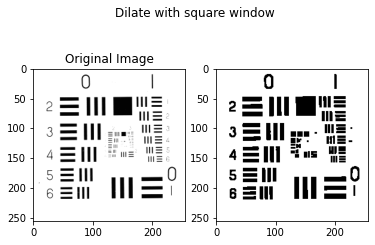

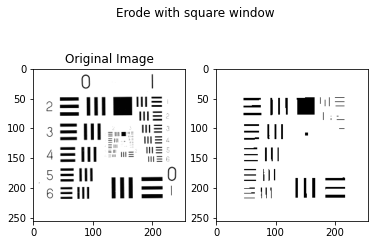

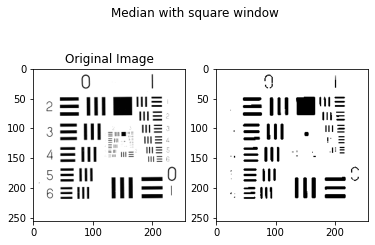

In [ ]:
#1.1 Applying the filters

# Using Square window
plt.subplot(1,2,1)
plt.imshow(Image,cmap='gray')
plt.title("Original Image")
Dil_Image = Dilate(bin_Image, Sq_Win, r1, r2)
plt.subplot(1,2,2)
plt.imshow(Dil_Image, cmap="gray")
plt.suptitle("Dilate with square window")
plt.show()
## erode
plt.subplot(1,2,1)
plt.imshow(Image,cmap='gray')
plt.title("Original Image")
Erode_Image = Erode(bin_Image, Sq_Win, r1, r2)
plt.subplot(1,2,2)
plt.imshow(Erode_Image, cmap="gray")
plt.suptitle("Erode with square window")
plt.show()
## median
plt.subplot(1,2,1)
plt.imshow(Image,cmap='gray')
plt.title("Original Image")
Med_Image = Median(bin_Image, Sq_Win, r1, r2)
plt.subplot(1,2,2)
plt.imshow(Med_Image, cmap="gray")
plt.suptitle("Median with square window")
plt.show()

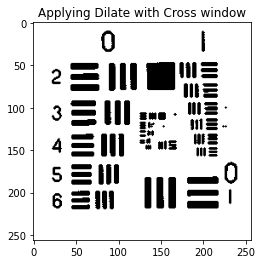

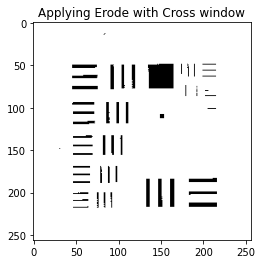

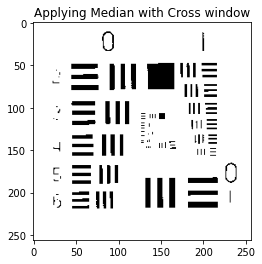

In [ ]:
# Using Cross window
Dil_Image = Dilate(bin_Image, Cross_Win, r1, r2)
plt.imshow(Dil_Image, cmap="gray")
plt.title("Applying Dilate with Cross window")
plt.show()

Erode_Image = Erode(bin_Image, Cross_Win, r1, r2)
plt.imshow(Erode_Image, cmap="gray")
plt.title("Applying Erode with Cross window")
plt.show()

Med_Image = Median(bin_Image, Cross_Win, r1, r2)
plt.imshow(Med_Image, cmap="gray")
plt.title("Applying Median with Cross window")
plt.show()

Verifying Duality

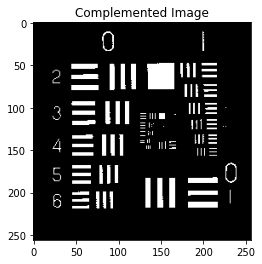

In [ ]:
# Veryfying duality

# Complemented image
# Using Square window
Comp_Image = comp_Im(bin_Image,r1, r2)
plt.imshow(Comp_Image, cmap="gray")
plt.title("Complemented Image")
plt.show()


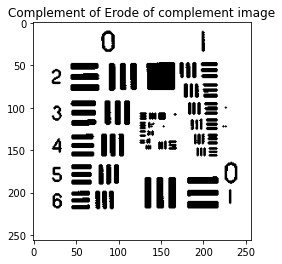

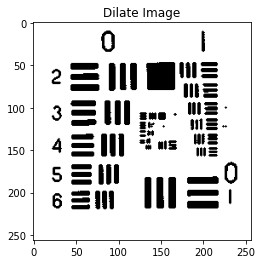

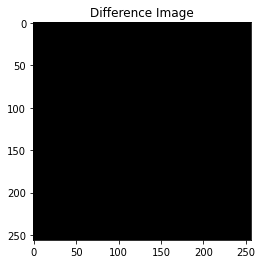

In [ ]:
# Erode is dual of dilate with respect to complementation

#Complement of Erode of complement image
comp_Erode_comp_Image = comp_Im(Erode(Comp_Image, Cross_Win, r1,r2), r1, r2)
plt.imshow(comp_Erode_comp_Image, cmap="gray")
plt.title("Complement of Erode of complement image")
plt.show()

#Dilated Image
plt.imshow(Dil_Image, cmap="gray")
plt.title("Dilate Image")
plt.show()

#Difference Image
plt.imshow(comp_Erode_comp_Image - Dil_Image, cmap = "gray")
plt.title("Difference Image")
plt.show()

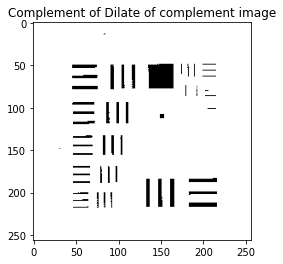

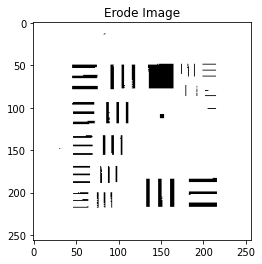

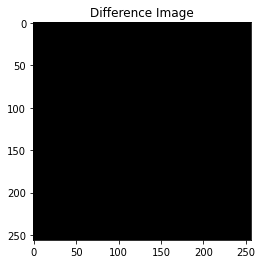

In [ ]:
# Dilate is dual of Erode with respect to complementation

#Complement of Dilate of complement image
comp_Dilate_comp_Image = comp_Im(Dilate(Comp_Image, Cross_Win, r1,r2), r1, r2)
plt.imshow(comp_Dilate_comp_Image, cmap="gray")
plt.title("Complement of Dilate of complement image")
plt.show()

#Erode Image
plt.imshow(Erode_Image, cmap="gray")
plt.title("Erode Image")
plt.show()

#Difference Image
plt.imshow(comp_Dilate_comp_Image - Erode_Image, cmap = "gray")
plt.title("Difference Image")
plt.show()

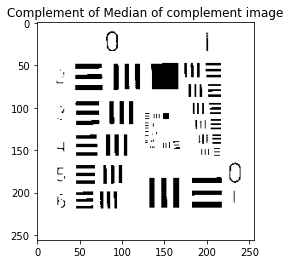

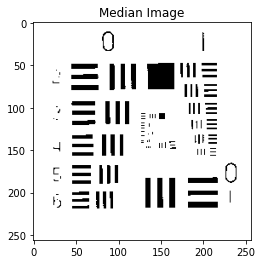

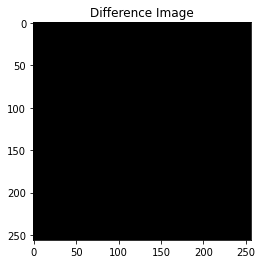

In [ ]:
# Median is dual of Median with respect to complementation

#Complement of Dilate of complement image
comp_Median_comp_Image = comp_Im(Median(Comp_Image, Cross_Win, r1,r2), r1, r2)
plt.imshow(comp_Median_comp_Image, cmap="gray")
plt.title("Complement of Median of complement image")
plt.show()

#Median Image
plt.imshow(Med_Image, cmap="gray")
plt.title("Median Image")
plt.show()

#Difference Image
plt.imshow(comp_Median_comp_Image - Med_Image, cmap = "gray")
plt.title("Difference Image")
plt.show()

Open and close operation

In [ ]:
# Open, Close
def Open(I, Win, r1, r2):
    erode_Image = Erode(I, Win, r1, r2)
    return Dilate(erode_Image, Win, r1, r2)

def Close(I, Win, r1, r2):
    Dil_image = Dilate(I, Win, r1, r2)
    return Erode(Dil_Image, Win, r1, r2)

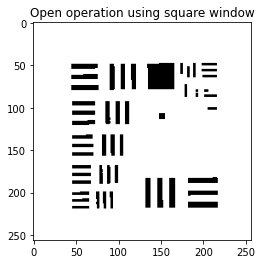

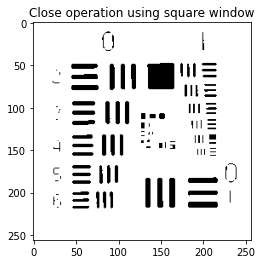

In [ ]:
# Using Square Window

Open_Image = Open(bin_Image, Sq_Win, r1, r2)
plt.imshow(Open_Image, cmap="gray")
plt.title("Open operation using square window")
plt.show()

Close_Image = Close(bin_Image, Sq_Win, r1, r2)
plt.imshow(Close_Image, cmap="gray")
plt.title("Close operation using square window")
plt.show()

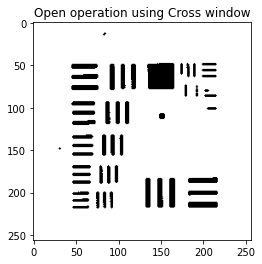

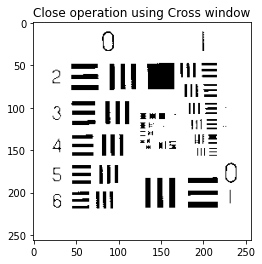

In [ ]:
# Using Cross Window

Open_Image = Open(bin_Image, Cross_Win, r1, r2)
plt.imshow(Open_Image, cmap="gray")
plt.title("Open operation using Cross window")
plt.show()

Close_Image = Close(bin_Image, Cross_Win, r1, r2)
plt.imshow(Close_Image, cmap="gray")
plt.title("Close operation using Cross window")
plt.show()

Open-close, Close-open

In [ ]:
#Open-Close, Close-Open

def OpenClose(I, Win, r1, r2):
    close_Image = Close(I, Win, r1, r2)
    return Open(close_Image, Win, r1, r2)

def CloseOpen(I, Win, r1, r2):
    open_Image = Open(I, Win, r1, r2)
    return Close(open_Image, Win, r1, r2)

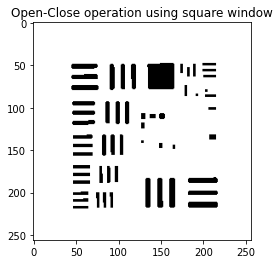

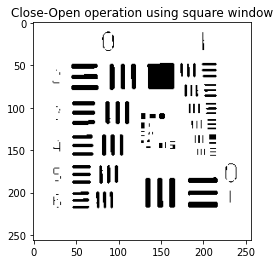

In [ ]:
# Using Square Window

OC_Image = OpenClose(bin_Image, Sq_Win, r1, r2)
plt.imshow(OC_Image, cmap="gray")
plt.title("Open-Close operation using square window")
plt.show()

CO_Image = CloseOpen(bin_Image, Sq_Win, r1, r2)
plt.imshow(CO_Image, cmap="gray")
plt.title("Close-Open operation using square window")
plt.show()

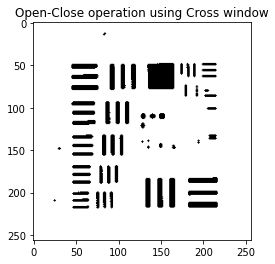

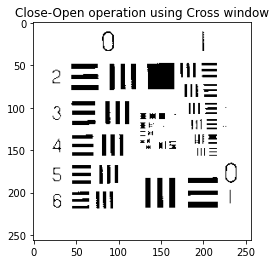

In [ ]:
# Using Cross Window

OC_Image = OpenClose(bin_Image, Cross_Win, r1, r2)
plt.imshow(OC_Image, cmap="gray")
plt.title("Open-Close operation using Cross window")
plt.show()

CO_Image = CloseOpen(bin_Image, Cross_Win, r1, r2)
plt.imshow(CO_Image, cmap="gray")
plt.title("Close-Open operation using Cross window")
plt.show()

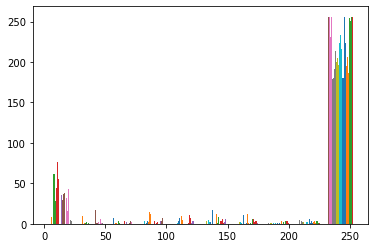

In [ ]:
plt.hist(Image)
plt.show()